In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

pd.set_option('display.max_columns', None)

### Import Data


In [200]:
filename = 'loan_data.csv'
df = pd.read_csv(filename)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_28764\2570835424.py:2: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [201]:
df.head(5)
print(df.shape)

(759338, 72)


In [202]:
selected_columns = [
    'annual_inc', 'dti', 'revol_util', 'emp_length', 'home_ownership',
    'purpose', 'loan_amnt', 'int_rate', 'installment', 'grade',
    'sub_grade', 'verification_status', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'total_acc', 'addr_state',
    'term', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'collections_12_mths_ex_med', 'loan_status' 
]

selected_df = df[selected_columns]
print(df.shape)
selected_df.head()

(759338, 72)


,annual_inc,dti,revol_util,emp_length,home_ownership,purpose,loan_amnt,int_rate,installment,grade,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,addr_state,term,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status
0,10000.0,21.61,55.1,NaN,OWN,credit_card,2300,12.62,77.08,C,C1,Not Verified,0,1.0,4,0,6,NY,36 months,382.99,270.09,112.90,0.0,0,Current
1,94000.0,25.61,105.8,10+ years,MORTGAGE,debt_consolidation,16000,12.62,360.95,C,C1,Not Verified,0,0.0,9,0,26,MA,60 months,2060.09,1186.93,873.16,0.0,0,Current
2,46350.0,8.88,44.9,7 years,MORTGAGE,home_improvement,6025,15.05,209.01,C,C4,Not Verified,0,0.0,11,0,27,MA,36 months,1032.46,684.18,348.28,0.0,0,Current
3,44000.0,27.06,18.7,10+ years,RENT,car,20400,9.44,652.91,B,B1,Source Verified,0,1.0,15,0,19,CA,36 months,3237.80,2501.19,736.61,0.0,0,Current
4,85000.0,6.79,88.0,10+ years,MORTGAGE,debt_consolidation,13000,11.99,431.73,B,B5,Source Verified,1,0.0,5,0,24,MN,36 months,2137.00,1539.34,597.66,0.0,0,Current


### Target Output - Loan Status

In [203]:
selected_df['loan_status'].value_counts()

loan_status
Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: count, dtype: int64

In [204]:
selected_df= selected_df[selected_df['loan_status'] != 'In Grace Period']                                                    # Remove loans in Grace Period
#df['loan_status'] = df['loan_status'].str.replace(pat='Late.*', regex=True, repl='Late')          # Late (15-30 days) ---> Late
selected_df['loan_status'] = selected_df['loan_status'].str.replace(pat='Default', regex=True, repl='Charged Off') 

selected_df['loan_status'].value_counts() 

loan_status
Current               565523
Fully Paid            130718
Charged Off            37233
Late (31-120 days)     15354
Late (16-30 days)       3876
Name: count, dtype: int64

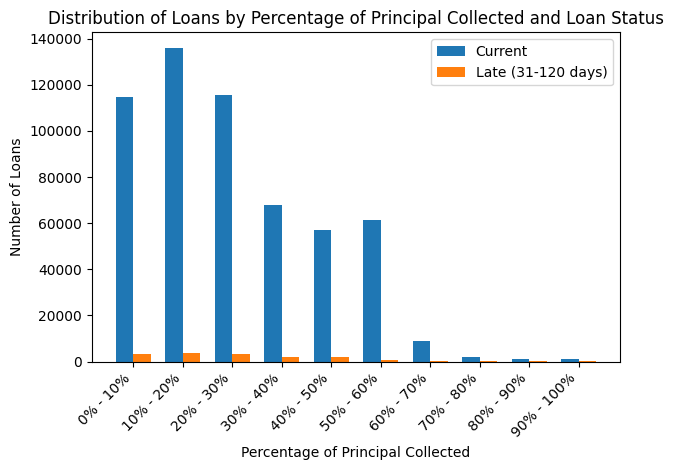

In [205]:
current_loans = selected_df[selected_df['loan_status'] == 'Current']
late_loans = selected_df[selected_df['loan_status'] == 'Late (31-120 days)']

# Combine both datasets into one DataFrame
combined_loans = pd.concat([current_loans, late_loans])

# Calculate the percentage of principal collected for each loan
combined_loans['principal_collected_percentage'] = (combined_loans['total_rec_prncp'] / combined_loans['loan_amnt']) * 100

# Define the percentage ranges
percentage_ranges = [(i, i+10) for i in range(0, 100, 10)]

# Initialize dictionaries to count the number of loans in each percentage range
current_loan_counts = {range_: 0 for range_ in percentage_ranges}
late_loan_counts = {range_: 0 for range_ in percentage_ranges}

# Count the number of loans in each percentage range for both loan statuses
for percentage, loan_status in zip(combined_loans['principal_collected_percentage'], combined_loans['loan_status']):
    for range_ in percentage_ranges:
        if range_[0] <= percentage < range_[1]:
            if loan_status == 'Current':
                current_loan_counts[range_] += 1
            elif loan_status == 'Late (31-120 days)':
                late_loan_counts[range_] += 1
            break  # Once the loan is counted in a range, move to the next loan

# Extract the range labels for plotting
labels = [f"{range_[0]}% - {range_[1]}%" for range_ in percentage_ranges]

# Extract the counts for plotting
current_counts = [current_loan_counts[range_] for range_ in percentage_ranges]
late_counts = [late_loan_counts[range_] for range_ in percentage_ranges]

# Plot the bar chart
bar_width = 0.35
x = np.arange(len(labels))
plt.bar(x - bar_width/2, current_counts, width=bar_width, label='Current')
plt.bar(x + bar_width/2, late_counts, width=bar_width, label='Late (31-120 days)')
plt.xlabel('Percentage of Principal Collected')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Percentage of Principal Collected and Loan Status')
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [206]:
# Calculate the percentage of principal collected for each loan
selected_df['principal_collected_percentage'] = (selected_df['total_rec_prncp'] / selected_df['loan_amnt']) * 100

# Update the loan status based on the percentage of principal collected
selected_df.loc[(selected_df['loan_status'] == 'Current') & (selected_df['principal_collected_percentage'] > 60), 'loan_status'] = 'Fully Paid'
selected_df.loc[(selected_df['loan_status'] == 'Late (31-120 days)') & (selected_df['principal_collected_percentage'] < 30), 'loan_status'] = 'Charged Off'

selected_df['loan_status'].value_counts() 

loan_status
Current               552507
Fully Paid            143734
Charged Off            47781
Late (31-120 days)      4806
Late (16-30 days)       3876
Name: count, dtype: int64

In [207]:
df_modified = selected_df[~selected_df['loan_status'].isin(['Late (16-30 days)', 'Late (31-120 days)', 'Current'])]
print(df_modified.shape)
df_modified['loan_status'].value_counts() 

(191515, 26)


loan_status
Fully Paid     143734
Charged Off     47781
Name: count, dtype: int64

In [208]:
df_modified.head()

,annual_inc,dti,revol_util,emp_length,home_ownership,purpose,loan_amnt,int_rate,installment,grade,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,addr_state,term,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage
8,153000.0,16.99,22.7,6 years,OWN,credit_card,11575,7.35,359.26,A,A4,Not Verified,0,0.0,20,1,46,CA,36 months,11707.816236,11575.0,132.82,0.0,0,Fully Paid,100.0
10,50000.0,6.07,98.9,2 years,RENT,debt_consolidation,7200,24.85,285.70,E,E3,Source Verified,0,0.0,4,0,5,WA,36 months,7206.461000,7200.0,6.46,0.0,0,Fully Paid,100.0
24,110000.0,13.12,27.2,7 years,MORTGAGE,debt_consolidation,7500,7.35,232.79,A,A4,Not Verified,0,2.0,19,0,27,TX,36 months,7642.289180,7500.0,142.29,0.0,0,Fully Paid,100.0
42,51979.0,10.11,20.0,7 years,RENT,debt_consolidation,10000,16.02,243.29,C,C5,Source Verified,0,0.0,15,2,21,CA,60 months,10026.700000,10000.0,26.70,0.0,0,Fully Paid,100.0
91,75000.0,10.86,90.0,7 years,MORTGAGE,debt_consolidation,14000,16.02,492.34,C,C5,Verified,1,0.0,4,0,10,MA,36 months,14375.136851,14000.0,375.14,0.0,0,Fully Paid,100.0


### Remove empty columns and correlated columns

In [209]:
df_numerical_features = df_modified.select_dtypes(include=['number', 'int', 'float'])
df_numerical_features.head()

,annual_inc,dti,revol_util,loan_amnt,int_rate,installment,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,principal_collected_percentage
8,153000.0,16.99,22.7,11575,7.35,359.26,0,0.0,20,1,46,11707.816236,11575.0,132.82,0.0,0,100.0
10,50000.0,6.07,98.9,7200,24.85,285.70,0,0.0,4,0,5,7206.461000,7200.0,6.46,0.0,0,100.0
24,110000.0,13.12,27.2,7500,7.35,232.79,0,2.0,19,0,27,7642.289180,7500.0,142.29,0.0,0,100.0
42,51979.0,10.11,20.0,10000,16.02,243.29,0,0.0,15,2,21,10026.700000,10000.0,26.70,0.0,0,100.0
91,75000.0,10.86,90.0,14000,16.02,492.34,1,0.0,4,0,10,14375.136851,14000.0,375.14,0.0,0,100.0


#### Numerical features

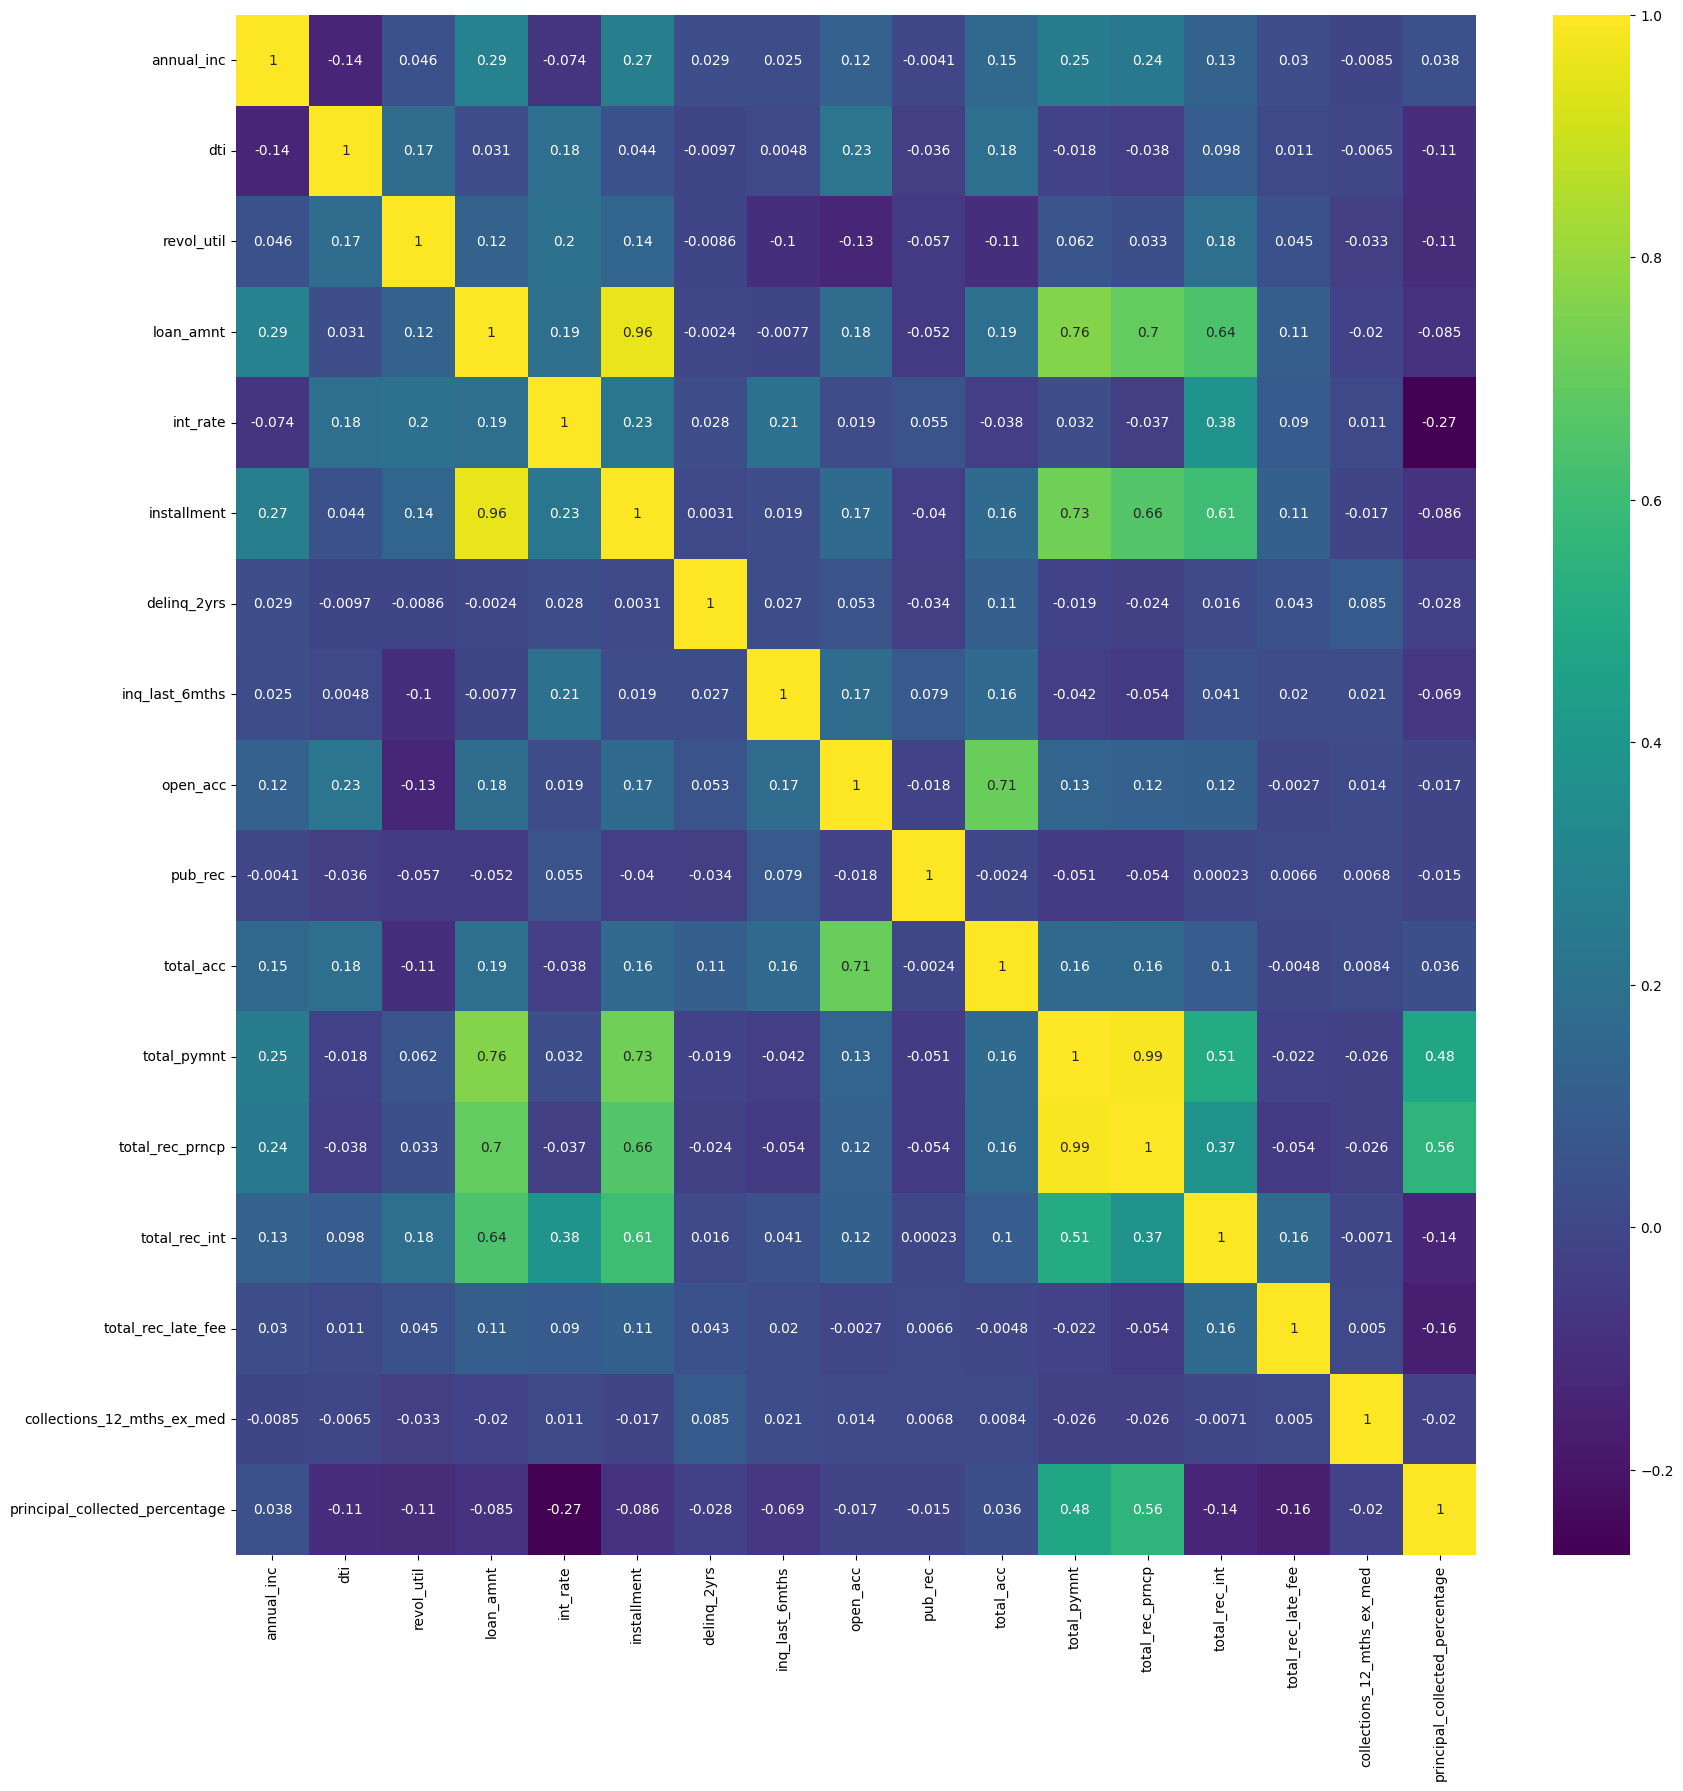

In [210]:
plt.figure(figsize=(20, 20));
sns.heatmap(df_numerical_features.corr(), annot=True, cmap='viridis');

In [211]:
df_modified = df_modified.drop(columns=['total_rec_prncp', 
                           'installment'])

In [212]:
df_modified.head()

,annual_inc,dti,revol_util,emp_length,home_ownership,purpose,loan_amnt,int_rate,grade,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,addr_state,term,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage
8,153000.0,16.99,22.7,6 years,OWN,credit_card,11575,7.35,A,A4,Not Verified,0,0.0,20,1,46,CA,36 months,11707.816236,132.82,0.0,0,Fully Paid,100.0
10,50000.0,6.07,98.9,2 years,RENT,debt_consolidation,7200,24.85,E,E3,Source Verified,0,0.0,4,0,5,WA,36 months,7206.461000,6.46,0.0,0,Fully Paid,100.0
24,110000.0,13.12,27.2,7 years,MORTGAGE,debt_consolidation,7500,7.35,A,A4,Not Verified,0,2.0,19,0,27,TX,36 months,7642.289180,142.29,0.0,0,Fully Paid,100.0
42,51979.0,10.11,20.0,7 years,RENT,debt_consolidation,10000,16.02,C,C5,Source Verified,0,0.0,15,2,21,CA,60 months,10026.700000,26.70,0.0,0,Fully Paid,100.0
91,75000.0,10.86,90.0,7 years,MORTGAGE,debt_consolidation,14000,16.02,C,C5,Verified,1,0.0,4,0,10,MA,36 months,14375.136851,375.14,0.0,0,Fully Paid,100.0


#### Handling Null values

In [213]:
null_columns = df_modified.columns[df_modified.isnull().any()]
df_modified[null_columns].describe(include='all')

,dti,revol_util,emp_length,inq_last_6mths
count,191475.000000,191381.000000,179277,191514.000000
unique,NaN,NaN,11,NaN
top,NaN,NaN,10+ years,NaN
freq,NaN,NaN,65182,NaN
mean,18.566909,47.740032,NaN,0.635572
std,11.188874,24.735198,NaN,0.918926
min,-1.000000,0.000000,NaN,0.000000
25%,11.900000,28.800000,NaN,0.000000
50%,17.890000,47.000000,NaN,0.000000
75%,24.600000,66.300000,NaN,1.000000


In [214]:
rows_with_null_dti = df_modified[df_modified['revol_util'].isnull()]

# Display the rows where 'dti' is null
rows_with_null_dti[null_columns].head(40)

,dti,revol_util,emp_length,inq_last_6mths
15313,5.90,NaN,9 years,0.0
30062,7.72,NaN,3 years,0.0
35096,0.00,NaN,10+ years,0.0
49422,28.16,NaN,10+ years,1.0
60865,21.69,NaN,5 years,0.0
64030,10.69,NaN,< 1 year,0.0
85143,11.89,NaN,10+ years,0.0
87712,0.00,NaN,10+ years,0.0
89549,5.62,NaN,5 years,0.0
89678,35.37,NaN,< 1 year,0.0


Correlation between DTI and loan_to_income_ratio: 0.5049405522860447


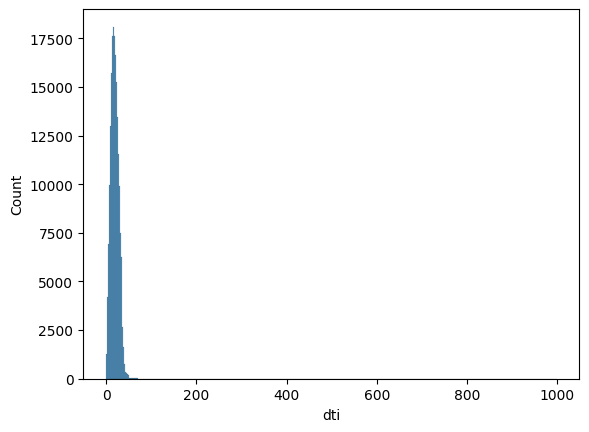

In [215]:
sns.histplot(df_modified['dti'].dropna(), kde=False, bins=450)

df_modified['loan_to_income_ratio'] = df_modified['loan_amnt'] / df_modified['annual_inc']

# Calculate the correlation coefficient
correlation = df_modified['dti'].corr(df_modified['loan_to_income_ratio'])

print("Correlation between DTI and loan_to_income_ratio:", correlation)


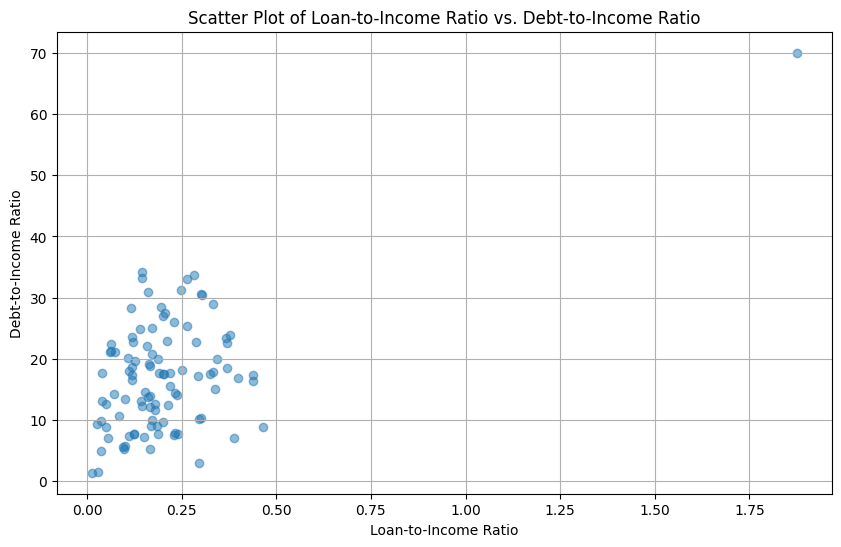

In [216]:
sampled_df = df_modified.sample(n=100, random_state=42)

# Plot the sampled data
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df['loan_to_income_ratio'], sampled_df['dti'], alpha=0.5)
plt.title('Scatter Plot of Loan-to-Income Ratio vs. Debt-to-Income Ratio')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Debt-to-Income Ratio')
plt.grid(True)
plt.show()

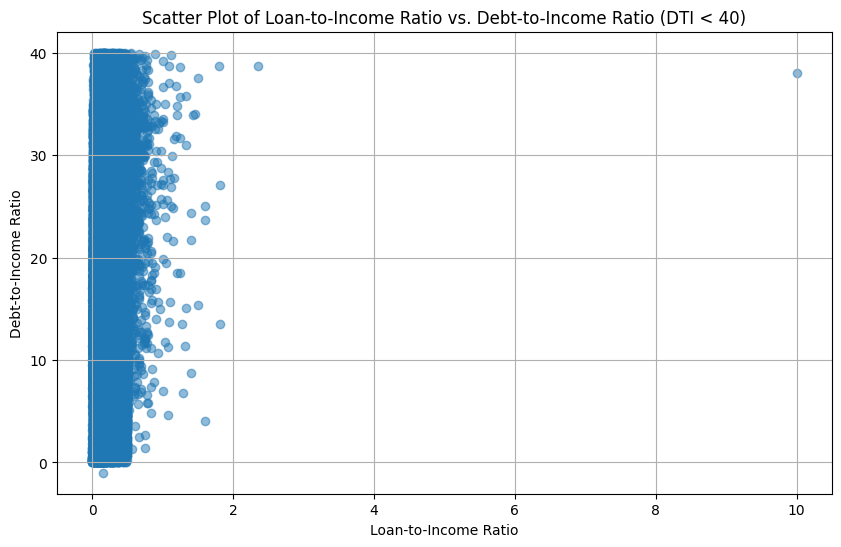

In [217]:
filtered_data = df_modified[df_modified['dti'] < 40]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['loan_to_income_ratio'], filtered_data['dti'], alpha=0.5)
plt.title('Scatter Plot of Loan-to-Income Ratio vs. Debt-to-Income Ratio (DTI < 40)')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Debt-to-Income Ratio')
plt.grid(True)
plt.show()

#### Numerical Variables

In [218]:
df_modified.describe()

C:\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,annual_inc,dti,revol_util,loan_amnt,int_rate,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,principal_collected_percentage,loan_to_income_ratio
count,1.915150e+05,191475.000000,191381.000000,191515.000000,191515.000000,191515.00000,191514.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,1.915150e+05
mean,7.984813e+04,18.566909,47.740032,14604.011174,13.787241,0.34201,0.635572,11.931541,0.261656,25.423622,12434.565498,1351.423787,1.292128,0.021236,76.797064,inf
std,7.632500e+04,11.188874,24.735198,9114.805202,5.470286,0.92968,0.918926,5.749732,0.653623,12.319893,9837.982116,1460.226132,8.331000,0.164154,36.723835,NaN
min,0.000000e+00,-1.000000,0.000000,1000.000000,5.320000,0.00000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.166667e-04
25%,4.900000e+04,11.900000,28.800000,7500.000000,9.750000,0.00000,0.000000,8.000000,0.000000,17.000000,4961.010000,376.310000,0.000000,0.000000,60.127357,1.154909e-01
50%,6.800000e+04,17.890000,47.000000,12000.000000,12.880000,0.00000,0.000000,11.000000,0.000000,24.000000,9935.580000,878.360000,0.000000,0.000000,100.000000,1.887932e-01
75%,9.500000e+04,24.600000,66.300000,20000.000000,16.990000,0.00000,1.000000,15.000000,0.000000,32.000000,17380.961238,1808.815000,0.000000,0.000000,100.000000,2.821429e-01
max,9.550000e+06,999.000000,172.000000,40000.000000,30.990000,21.00000,5.000000,86.000000,46.000000,176.000000,52779.784886,15112.400000,410.600000,12.000000,100.000000,inf


Shape of the DataFrame where Annual Income is less than 400000: (190837, 25)


<Axes: xlabel='annual_inc', ylabel='Count'>

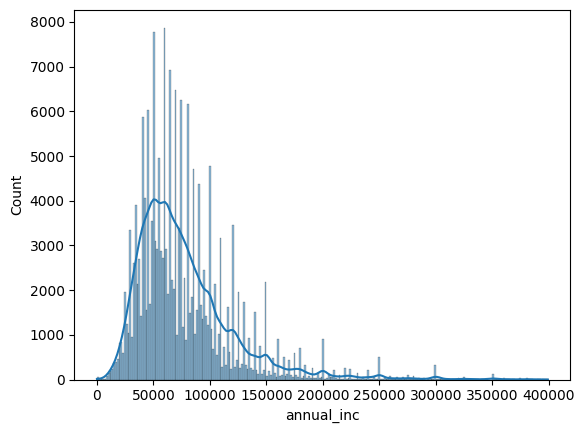

In [226]:
######## annual_inc
threshold = 400000
filtered_df = df_modified[df_modified['annual_inc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where Annual Income is less than {threshold}:", filtered_df.shape)

sns.histplot(filtered_df['annual_inc'], kde = True)

Shape of the DataFrame where DTI is less than 47: (190863, 25)


<Axes: xlabel='dti', ylabel='Count'>

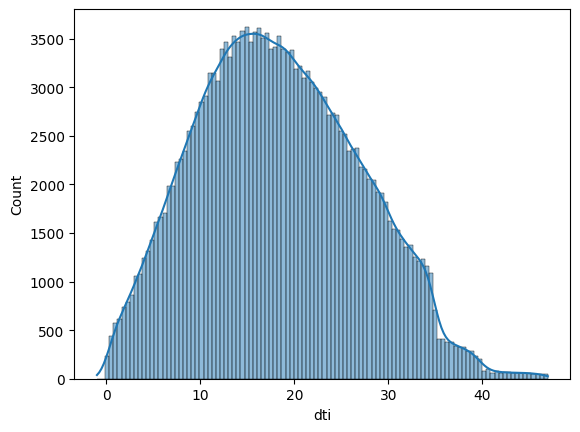

In [227]:
######## dti
threshold = 47
filtered_df = df_modified[df_modified['dti'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where DTI is less than {threshold}:", filtered_df.shape)

sns.histplot(filtered_df['dti'], kde = True)

In [228]:
df_modified['dti'] = df_modified['dti'].fillna(df_modified['dti'].mean())

In [229]:
########  inq_last_6mths
null_inq_last_6mths_df = df_modified[df_modified['inq_last_6mths'].isnull()]
null_inq_last_6mths_df['loan_status'].value_counts()

loan_status
Fully Paid    1
Name: count, dtype: int64

In [231]:
df_modified.loc[:, 'inq_last_6mths'] = df_modified['inq_last_6mths'].fillna(0)

In [26]:
####### revol_util
null_revol_util_df = df_modified[df_modified['revol_util'].isnull()]
print(null_revol_util_df['loan_status'].value_counts())

df_modified['revol_util'] = df_modified['revol_util'].fillna(df_modified['revol_util'].mean())

loan_status
Fully Paid     102
Charged Off     32
Name: count, dtype: int64


#### Categorical variables

In [27]:
print(df_modified.describe(include='object'))
df_modified.head()

       emp_length home_ownership             purpose   grade sub_grade  \
count      179277         191515              191515  191515    191515   
unique         11              5                  12       7        35   
top     10+ years       MORTGAGE  debt_consolidation       C        C1   
freq        65182          95330              109785   56959     12914   

       verification_status addr_state       term loan_status  
count               191515     191515     191515      191515  
unique                   3         50          2           2  
top        Source Verified         CA  36 months  Fully Paid  
freq                 77231      28017     146106      143734  


,annual_inc,dti,revol_util,emp_length,home_ownership,purpose,loan_amnt,int_rate,grade,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,addr_state,term,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage
8,153000.0,16.99,22.7,6 years,OWN,credit_card,11575,7.35,A,A4,Not Verified,0,0.0,20,1,46,CA,36 months,11707.816236,132.82,0.0,0,Fully Paid,100.0
10,50000.0,6.07,98.9,2 years,RENT,debt_consolidation,7200,24.85,E,E3,Source Verified,0,0.0,4,0,5,WA,36 months,7206.461000,6.46,0.0,0,Fully Paid,100.0
24,110000.0,13.12,27.2,7 years,MORTGAGE,debt_consolidation,7500,7.35,A,A4,Not Verified,0,2.0,19,0,27,TX,36 months,7642.289180,142.29,0.0,0,Fully Paid,100.0
42,51979.0,10.11,20.0,7 years,RENT,debt_consolidation,10000,16.02,C,C5,Source Verified,0,0.0,15,2,21,CA,60 months,10026.700000,26.70,0.0,0,Fully Paid,100.0
91,75000.0,10.86,90.0,7 years,MORTGAGE,debt_consolidation,14000,16.02,C,C5,Verified,1,0.0,4,0,10,MA,36 months,14375.136851,375.14,0.0,0,Fully Paid,100.0


##### Grade and SubGrade

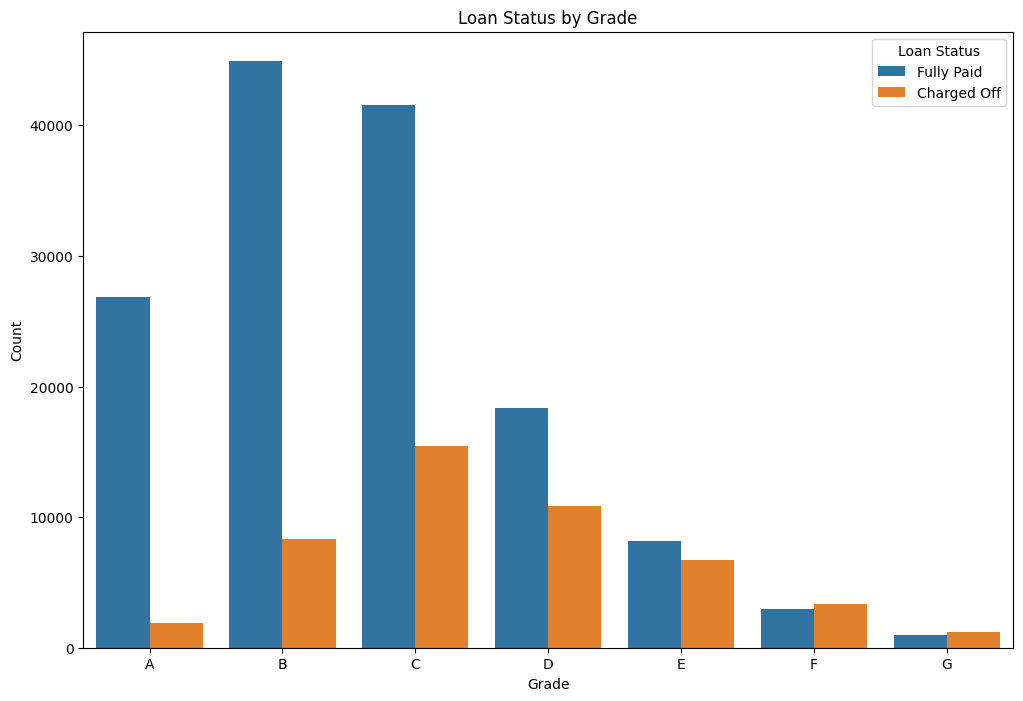

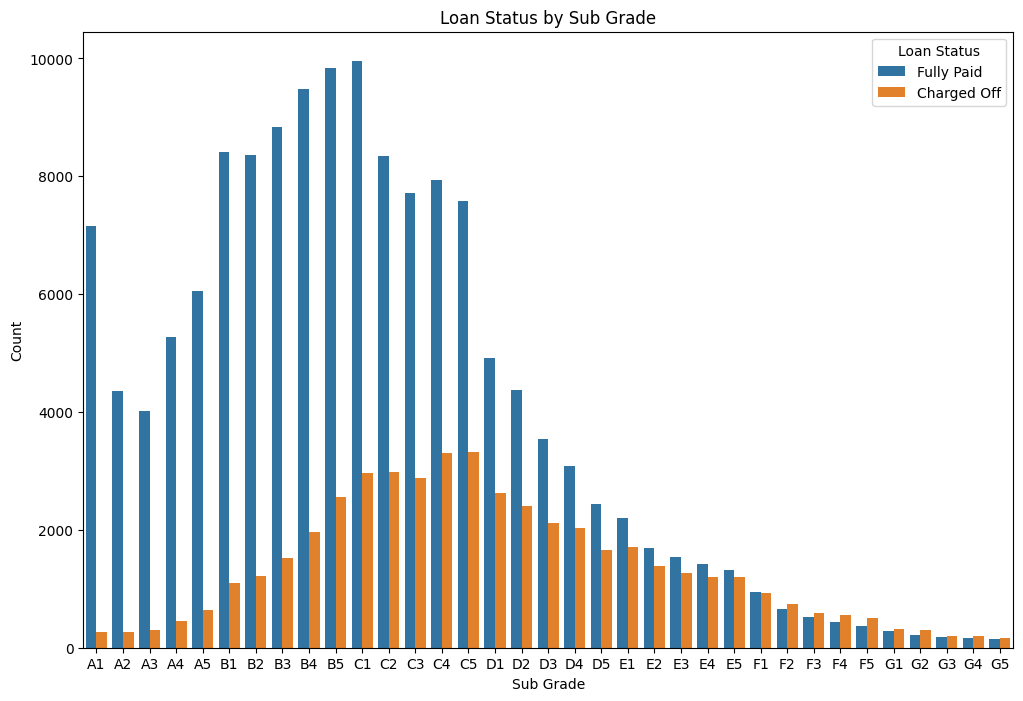

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x='grade', hue='loan_status', data=df_modified, order=sorted(df_modified['grade'].unique()))
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade', hue='loan_status', data=df_modified, order=sorted(df_modified['sub_grade'].unique()))
plt.title('Loan Status by Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [29]:
df_modified = df_modified.drop(columns=['grade']);

##### Home Ownership

In [30]:
df_modified['home_ownership'].value_counts()

home_ownership
MORTGAGE    95330
RENT        72242
OWN         23837
ANY           105
NONE            1
Name: count, dtype: int64

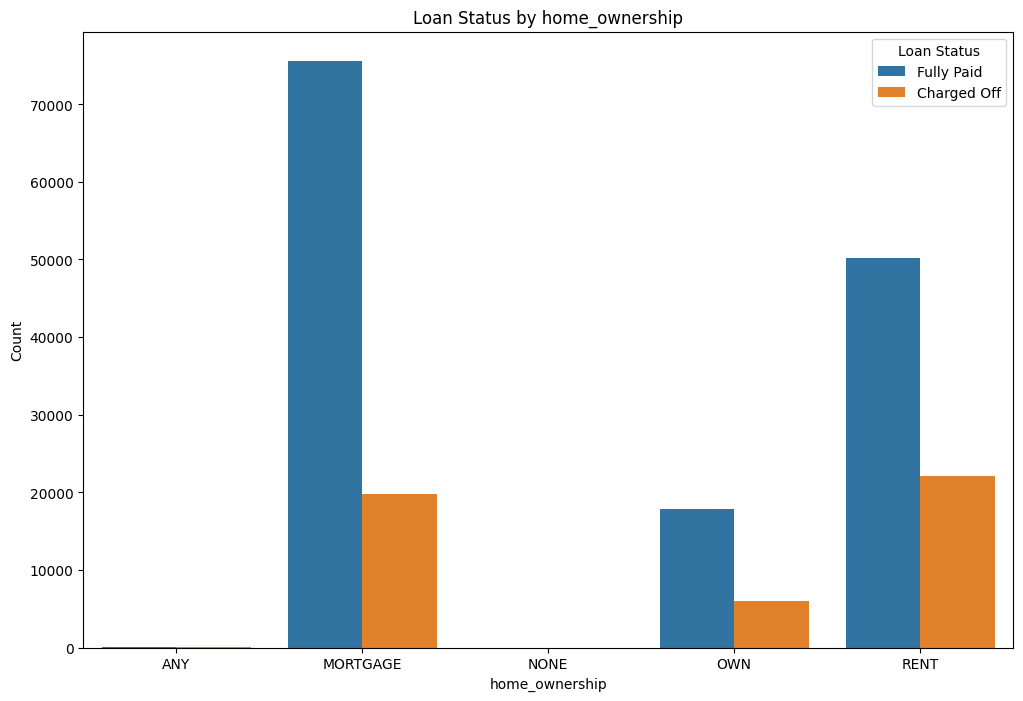

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x='home_ownership', hue='loan_status', data=df_modified, order=sorted(df_modified['home_ownership'].unique()))
plt.title('Loan Status by home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

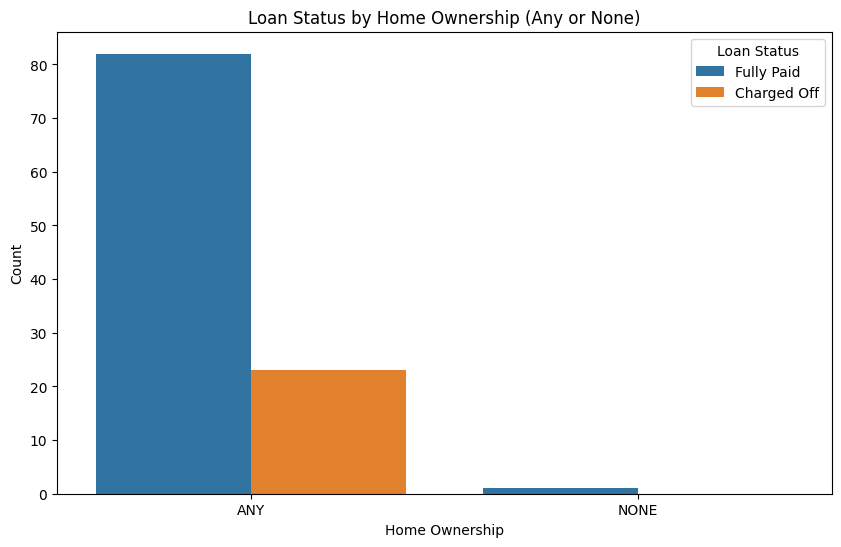

In [32]:
# Filter the DataFrame for rows where home_ownership is 'any' or 'none'
filtered_df = df_modified[df_modified['home_ownership'].isin(['ANY', 'NONE'])]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=filtered_df)
plt.title('Loan Status by Home Ownership (Any or None)')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [33]:
df_modified.loc[df_modified['home_ownership'] == 'NONE', 'home_ownership'] = 'ANY'
df_modified['home_ownership'].value_counts()

home_ownership
MORTGAGE    95330
RENT        72242
OWN         23837
ANY           106
Name: count, dtype: int64

##### Purpose

In [34]:
df_modified['purpose'].value_counts()

purpose
debt_consolidation    109785
credit_card            37169
home_improvement       14683
other                  13199
major_purchase          5009
medical                 2628
car                     2255
small_business          2126
moving                  1697
vacation                1612
house                   1200
renewable_energy         152
Name: count, dtype: int64

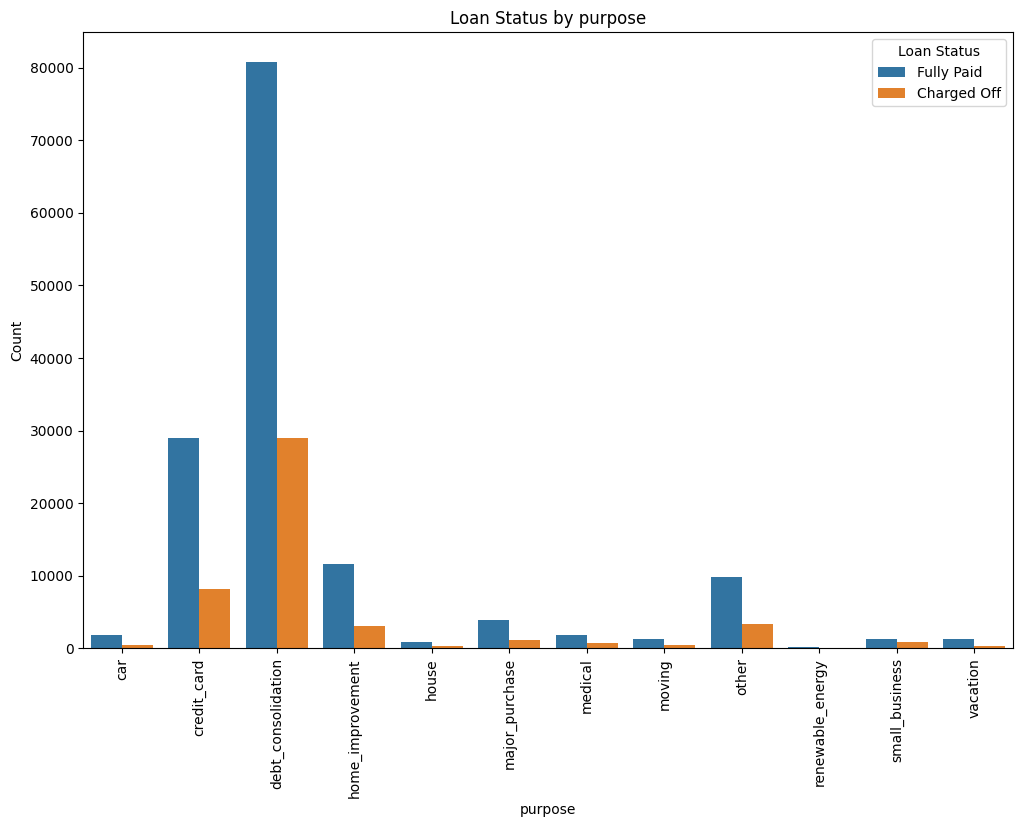

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x='purpose', hue='loan_status', data=df_modified, order=sorted(df_modified['purpose'].unique()))
plt.title('Loan Status by purpose')
plt.xlabel('purpose')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

##### Verification Status

In [36]:
df_modified['verification_status'].value_counts()

verification_status
Source Verified    77231
Not Verified       57301
Verified           56983
Name: count, dtype: int64

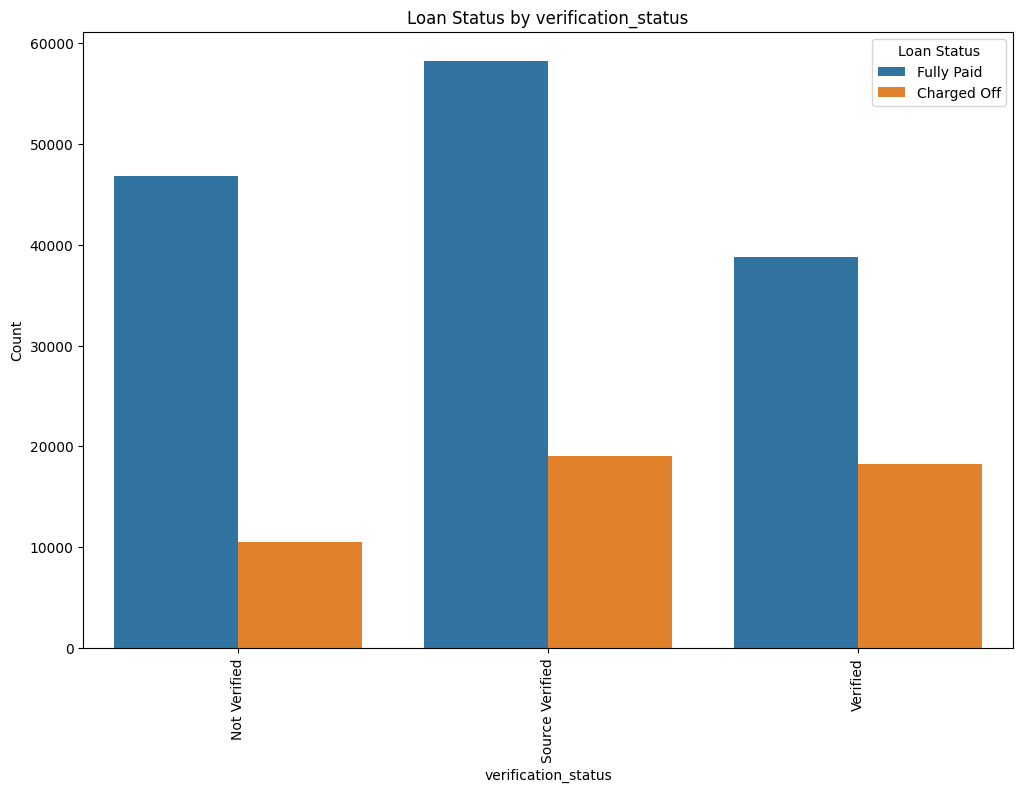

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(x='verification_status', hue='loan_status', data=df_modified, order=sorted(df_modified['verification_status'].unique()))
plt.title('Loan Status by verification_status')
plt.xlabel('verification_status')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

##### Employment Length

emp_length
10+ years    65182
2 years      17570
3 years      15483
< 1 year     14739
1 year       13072
5 years      11808
4 years      11301
6 years       8160
8 years       7971
9 years       7602
7 years       6389
Name: count, dtype: int64
--------------------------------

loan_status
Fully Paid     8194
Charged Off    4044
Name: count, dtype: int64


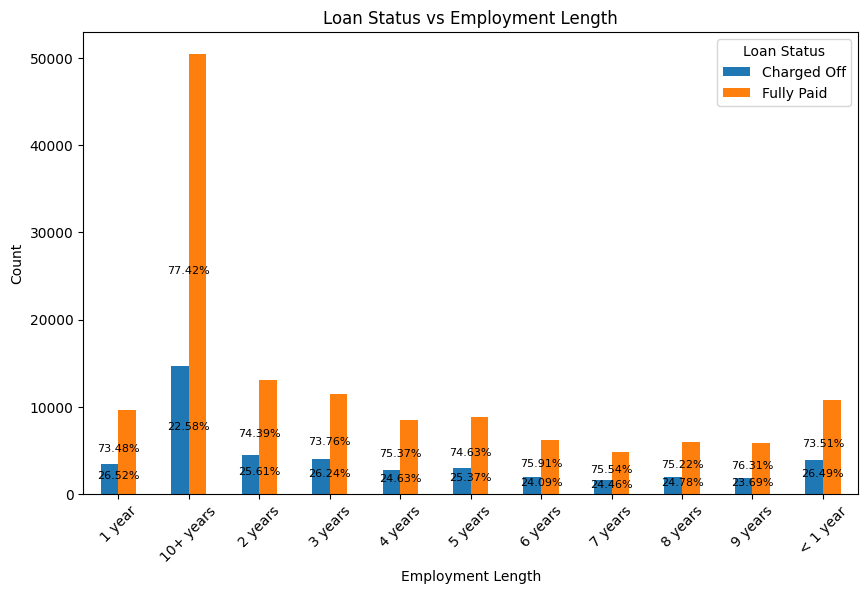

In [38]:
print(df_modified['emp_length'].value_counts())
print('--------------------------------\n')

null_emp_length_df = df_modified[df_modified['emp_length'].isnull()]
print(null_emp_length_df['loan_status'].value_counts())

grouped = df_modified.groupby(['emp_length', 'loan_status']).size().unstack();
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Loan Status vs Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')


for col in grouped.columns:
    for i, val in enumerate(grouped.index):
        total_counts = grouped.loc[val].sum()
        if total_counts != 0:
            percentage = (grouped.loc[val, col] / total_counts * 100).round(2)
            plt.text(i, grouped.loc[val, col] / 2, str(percentage) + '%', ha='center', color='black', fontsize=8)

plt.show()

In [39]:
df_modified = df_modified.drop(columns='emp_length');

##### earliest cr line

In [40]:
# df_modified['earliest_cr_line'].value_counts()

In [41]:
# df_modified.loc[:, 'earliest_cr_line'] = pd.to_datetime(df_modified['earliest_cr_line'], format='%b-%Y').dt.year

In [42]:
# grouped = df_modified.groupby(['earliest_cr_line', 'loan_status']).size().unstack()

# plt.figure(figsize=(12, 8))
# grouped.plot(kind='line')
# plt.title('Loan Status over Time')
# plt.xlabel('Earliest Credit Line')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.legend(title='Loan Status')
# plt.show()

##### Address State

In [43]:
df_modified['addr_state'].unique()


array(['CA', 'WA', 'TX', 'MA', 'NJ', 'FL', 'NY', 'CT', 'MT', 'MN', 'WI',
       'AR', 'MI', 'VA', 'GA', 'DC', 'MD', 'MS', 'PA', 'MO', 'SC', 'NV',
       'OH', 'CO', 'LA', 'HI', 'NM', 'IN', 'AZ', 'TN', 'IL', 'KY', 'OR',
       'ME', 'NC', 'OK', 'ND', 'RI', 'ID', 'AL', 'SD', 'UT', 'NH', 'KS',
       'NE', 'VT', 'DE', 'AK', 'WY', 'WV'], dtype=object)

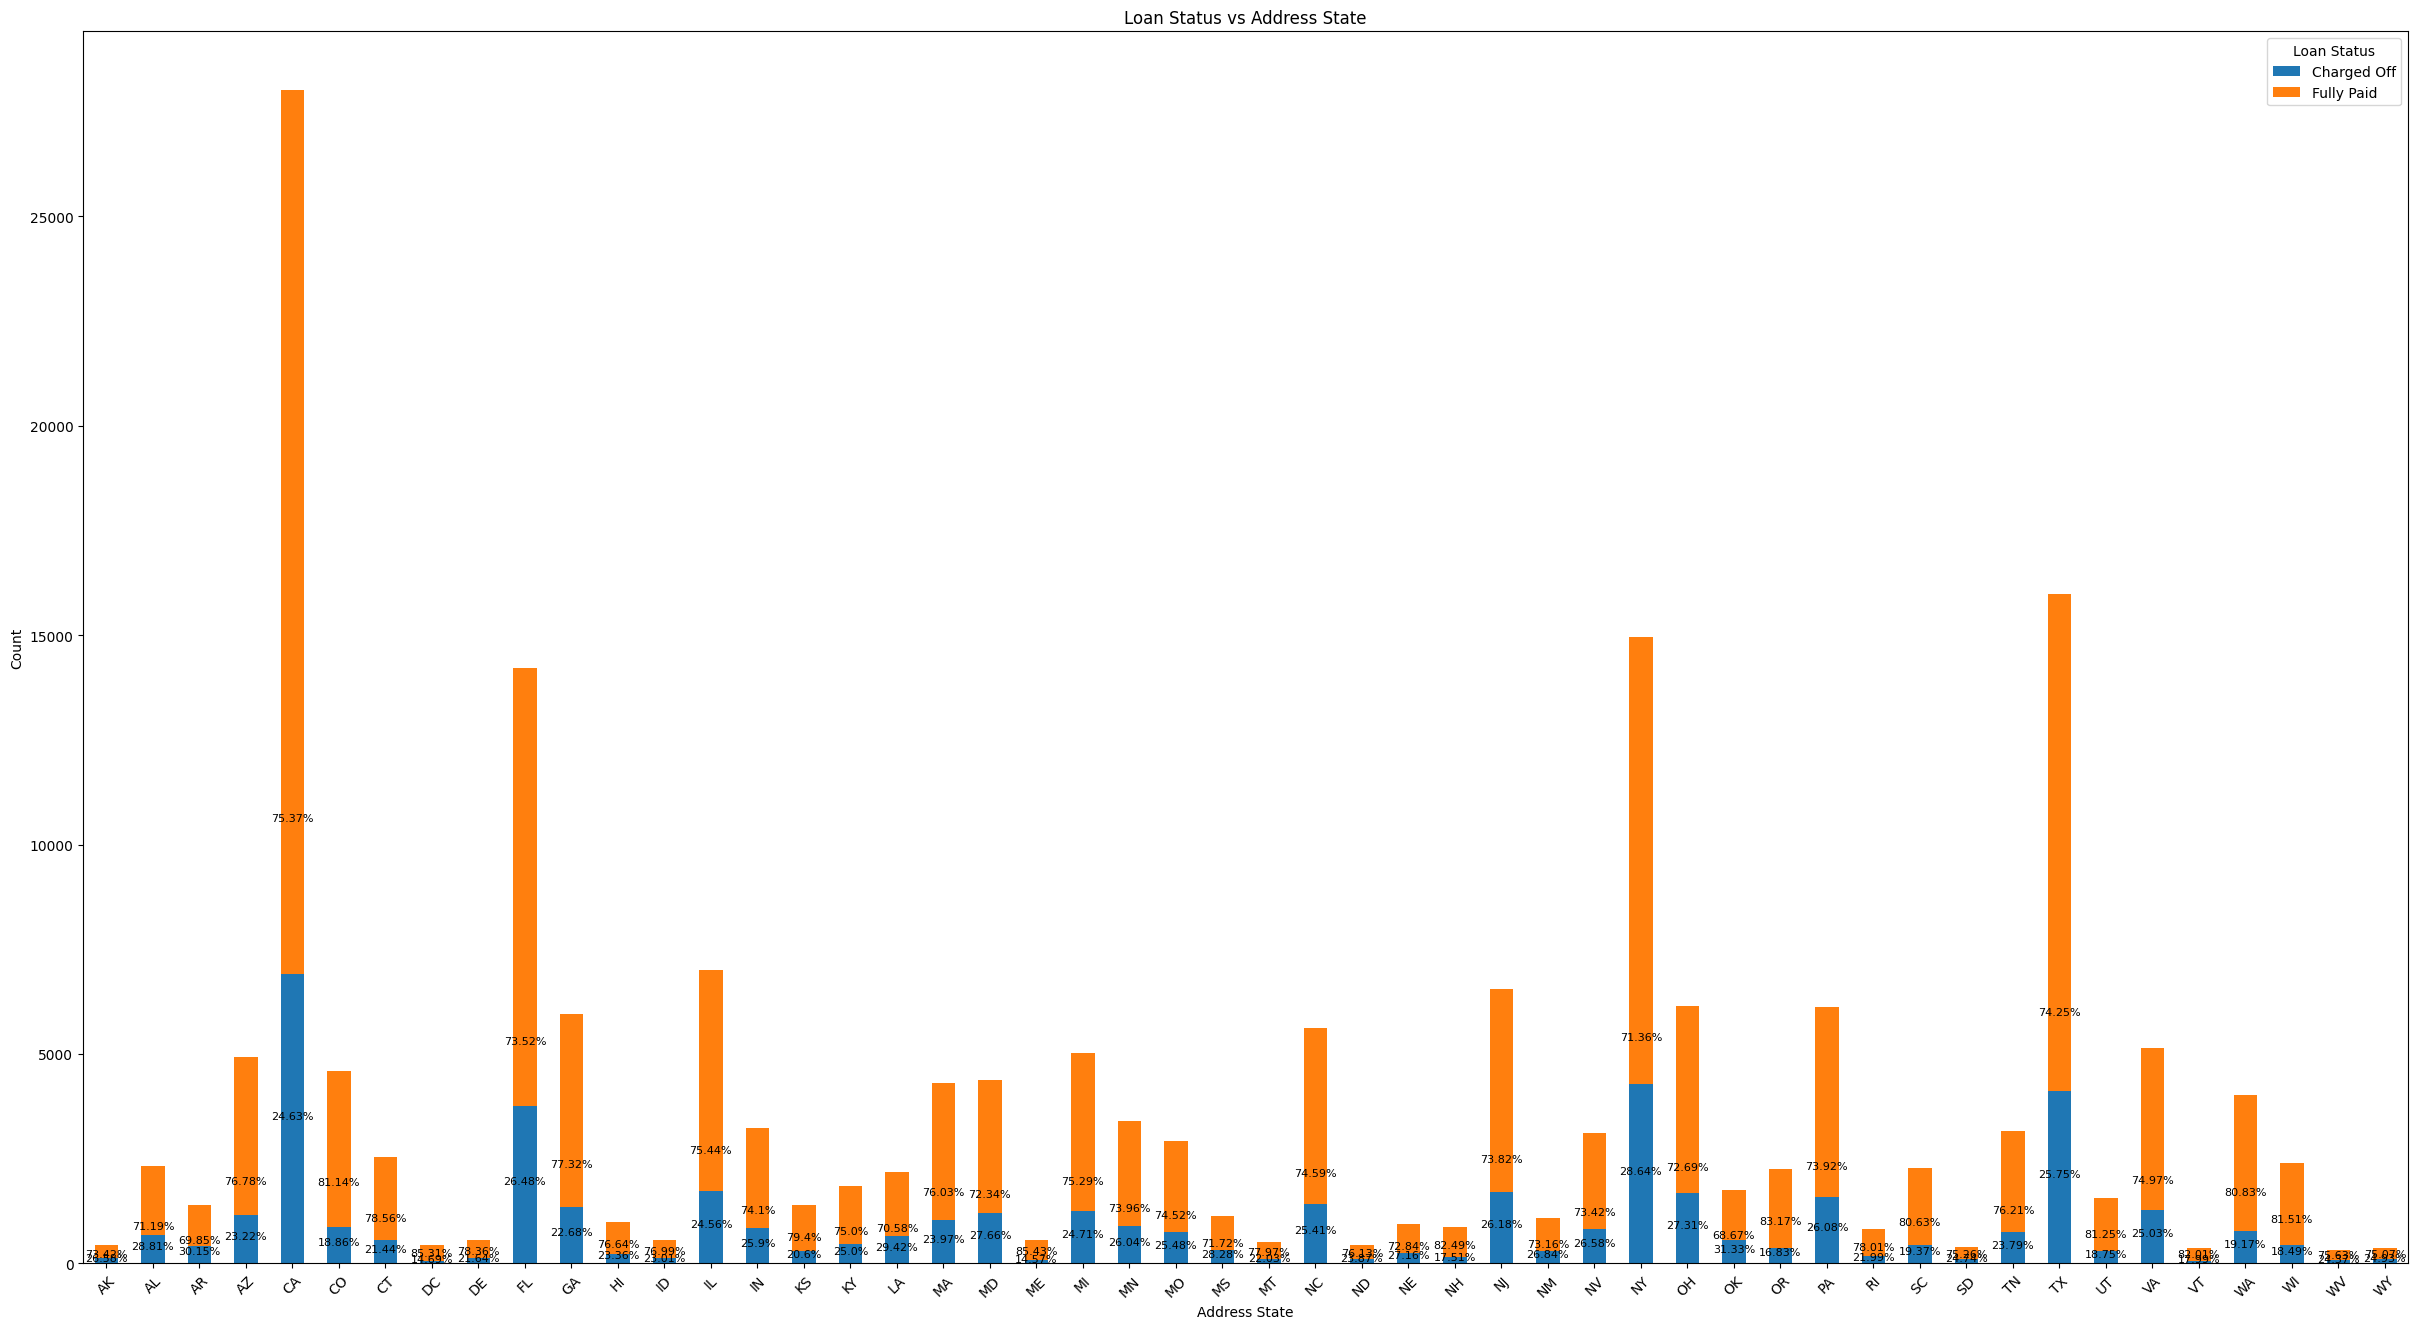

In [44]:
# Group by addr_state and loan_status
grouped_state = df_modified.groupby(['addr_state', 'loan_status']).size().unstack()

# Plot
plt.figure(figsize=(30, 16))
grouped_state.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Loan Status vs Address State')
plt.xlabel('Address State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')

# Calculate and display the percentage of loan status in every address state
for col in grouped_state.columns:
    for i, val in enumerate(grouped_state.index):
        total_counts = grouped_state.loc[val].sum()
        if total_counts != 0:
            percentage = (grouped_state.loc[val, col] / total_counts * 100).round(2)
            plt.text(i, grouped_state.loc[val, col] / 2, str(percentage) + '%', ha='center', color='black', fontsize=8)

plt.show()

##### Term

In [45]:
df_modified['term'].value_counts()

term
36 months    146106
60 months     45409
Name: count, dtype: int64

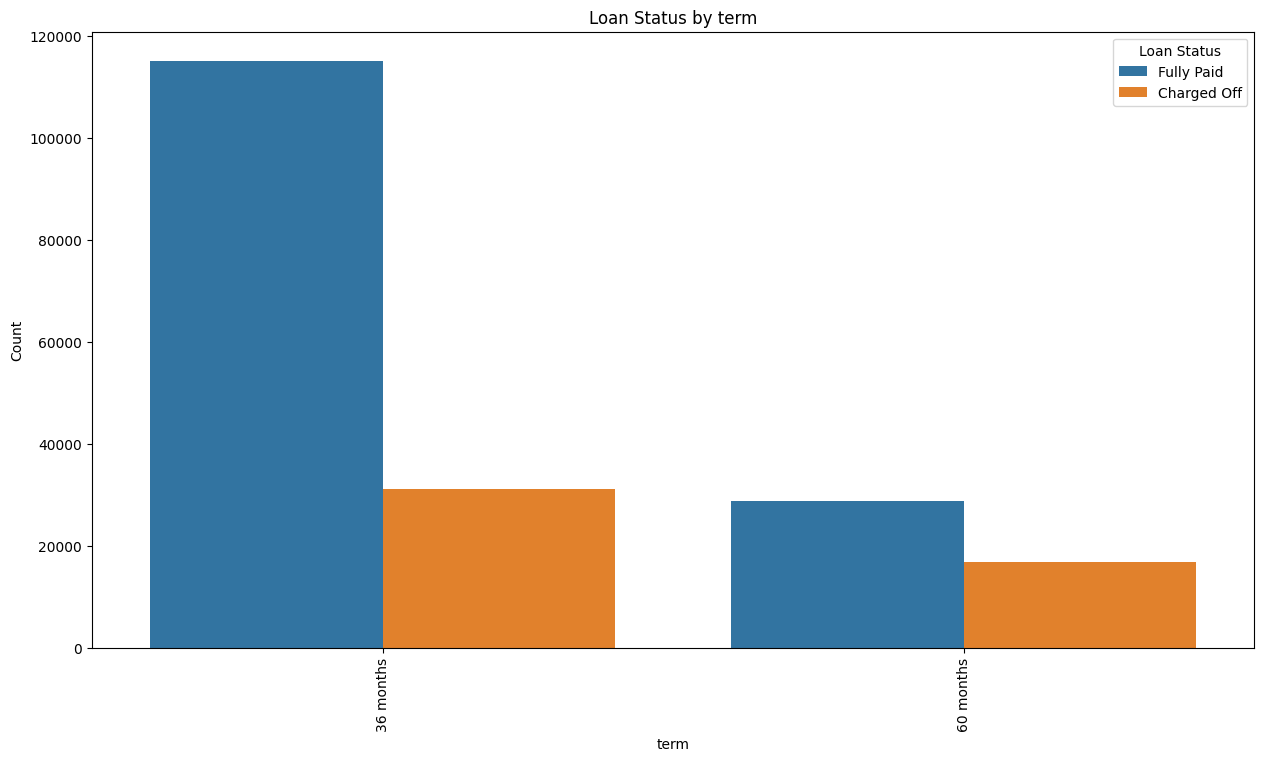

In [46]:
plt.figure(figsize=(15,8))
sns.countplot(x='term', hue='loan_status', data=df_modified, order=sorted(df_modified['term'].unique()))
plt.title('Loan Status by term')
plt.xlabel('term')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

#### Encoding Categorical variables

In [47]:
df_modified.describe(include='object')

,home_ownership,purpose,sub_grade,verification_status,addr_state,term,loan_status
count,191515,191515,191515,191515,191515,191515,191515
unique,4,12,35,3,50,2,2
top,MORTGAGE,debt_consolidation,C1,Source Verified,CA,36 months,Fully Paid
freq,95330,109785,12914,77231,28017,146106,143734


##### Ranking Categorical variables

###### sub_grade

In [48]:
sub_grades = df_modified['sub_grade'].unique();
print(sub_grades)

encoder = OrdinalEncoder(categories=[sub_grades])

encoded_sub_grades = encoder.fit_transform(df_modified[['sub_grade']])
print(encoded_sub_grades)

df_modified['encoded_sub_grade'] = encoded_sub_grades
print(df_modified.shape)
df_modified.describe(include='all')

['A4' 'E3' 'C5' 'G1' 'B5' 'D2' 'B4' 'B3' 'B1' 'C4' 'D5' 'B2' 'C2' 'D4'
 'E2' 'A1' 'E1' 'E4' 'C3' 'E5' 'D1' 'G3' 'A3' 'C1' 'A5' 'D3' 'F3' 'F5'
 'A2' 'G2' 'F2' 'G4' 'F4' 'G5' 'F1']
[[ 0.]
 [ 1.]
 [ 0.]
 ...
 [11.]
 [24.]
 [11.]]
(191515, 23)


,annual_inc,dti,revol_util,home_ownership,purpose,loan_amnt,int_rate,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,addr_state,term,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage,encoded_sub_grade
count,1.915150e+05,191515.000000,191515.000000,191515,191515,191515.000000,191515.000000,191515,191515,191515.00000,191515.000000,191515.000000,191515.000000,191515.000000,191515,191515,191515.000000,191515.000000,191515.000000,191515.000000,191515,191515.000000,191515.000000
unique,NaN,NaN,NaN,4,12,NaN,NaN,35,3,NaN,NaN,NaN,NaN,NaN,50,2,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,MORTGAGE,debt_consolidation,NaN,NaN,C1,Source Verified,NaN,NaN,NaN,NaN,NaN,CA,36 months,NaN,NaN,NaN,NaN,Fully Paid,NaN,NaN
freq,NaN,NaN,NaN,95330,109785,NaN,NaN,12914,77231,NaN,NaN,NaN,NaN,NaN,28017,146106,NaN,NaN,NaN,NaN,143734,NaN,NaN
mean,7.984813e+04,18.566909,47.740032,NaN,NaN,14604.011174,13.787241,NaN,NaN,0.34201,0.635569,11.931541,0.261656,25.423622,NaN,NaN,12434.565498,1351.423787,1.292128,0.021236,NaN,76.797064,12.975495
std,7.632500e+04,11.187706,24.726543,NaN,NaN,9114.805202,5.470286,NaN,NaN,0.92968,0.918925,5.749732,0.653623,12.319893,NaN,NaN,9837.982116,1460.226132,8.331000,0.164154,NaN,36.723835,8.272129
min,0.000000e+00,-1.000000,0.000000,NaN,NaN,1000.000000,5.320000,NaN,NaN,0.00000,0.000000,1.000000,0.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,4.900000e+04,11.900000,28.800000,NaN,NaN,7500.000000,9.750000,NaN,NaN,0.00000,0.000000,8.000000,0.000000,17.000000,NaN,NaN,4961.010000,376.310000,0.000000,0.000000,NaN,60.127357,6.000000
50%,6.800000e+04,17.900000,47.000000,NaN,NaN,12000.000000,12.880000,NaN,NaN,0.00000,0.000000,11.000000,0.000000,24.000000,NaN,NaN,9935.580000,878.360000,0.000000,0.000000,NaN,100.000000,12.000000
75%,9.500000e+04,24.600000,66.300000,NaN,NaN,20000.000000,16.990000,NaN,NaN,0.00000,1.000000,15.000000,0.000000,32.000000,NaN,NaN,17380.961238,1808.815000,0.000000,0.000000,NaN,100.000000,20.000000


##### Nominal categorical variables


###### home_ownership

In [49]:
ownership_types = df_modified['home_ownership'].unique()
print(ownership_types)
print('----------------\n')
print(df_modified['home_ownership'].value_counts())

one_hot_df = pd.get_dummies(df_modified['home_ownership'], prefix='home_ownership')

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_encoded_home_ownership = pd.concat([df_modified, one_hot_df], axis=1)

print(df_encoded_home_ownership.shape)
print(df_encoded_home_ownership.describe(include='all'))


['OWN' 'RENT' 'MORTGAGE' 'ANY']
----------------

home_ownership
MORTGAGE    95330
RENT        72242
OWN         23837
ANY           106
Name: count, dtype: int64
(191515, 27)
          annual_inc            dti     revol_util home_ownership  \
count   1.915150e+05  191515.000000  191515.000000         191515   
unique           NaN            NaN            NaN              4   
top              NaN            NaN            NaN       MORTGAGE   
freq             NaN            NaN            NaN          95330   
mean    7.984813e+04      18.566909      47.740032            NaN   
std     7.632500e+04      11.187706      24.726543            NaN   
min     0.000000e+00      -1.000000       0.000000            NaN   
25%     4.900000e+04      11.900000      28.800000            NaN   
50%     6.800000e+04      17.900000      47.000000            NaN   
75%     9.500000e+04      24.600000      66.300000            NaN   
max     9.550000e+06     999.000000     172.000000            NaN

###### Purpose

In [50]:
purposes = df_modified['purpose'].unique()
print(purposes)
print('----------------\n')
print(df_modified['purpose'].value_counts())

one_hot_df = pd.get_dummies(df_encoded_home_ownership['purpose'], prefix='purpose')

df_encoded_purpose = pd.concat([df_encoded_home_ownership, one_hot_df], axis=1)

print(df_encoded_purpose.shape)
print(df_encoded_purpose.describe(include='all'))

['credit_card' 'debt_consolidation' 'home_improvement' 'other' 'medical'
 'major_purchase' 'moving' 'car' 'vacation' 'small_business' 'house'
 'renewable_energy']
----------------

purpose
debt_consolidation    109785
credit_card            37169
home_improvement       14683
other                  13199
major_purchase          5009
medical                 2628
car                     2255
small_business          2126
moving                  1697
vacation                1612
house                   1200
renewable_energy         152
Name: count, dtype: int64
(191515, 39)
          annual_inc            dti     revol_util home_ownership  \
count   1.915150e+05  191515.000000  191515.000000         191515   
unique           NaN            NaN            NaN              4   
top              NaN            NaN            NaN       MORTGAGE   
freq             NaN            NaN            NaN          95330   
mean    7.984813e+04      18.566909      47.740032            NaN   
std     7.

###### verification_status

In [51]:
verification_statuses = df_modified['verification_status'].unique()
print(verification_statuses)
print('----------------\n')
print(df_modified['verification_status'].value_counts())

one_hot_df = pd.get_dummies(df_encoded_purpose['verification_status'], prefix='verification_status')

df_encoded_verification_status = pd.concat([df_encoded_purpose, one_hot_df], axis=1)

print(df_encoded_verification_status.shape)
print(df_encoded_verification_status.describe(include='all'))

['Not Verified' 'Source Verified' 'Verified']
----------------

verification_status
Source Verified    77231
Not Verified       57301
Verified           56983
Name: count, dtype: int64
(191515, 42)
          annual_inc            dti     revol_util home_ownership  \
count   1.915150e+05  191515.000000  191515.000000         191515   
unique           NaN            NaN            NaN              4   
top              NaN            NaN            NaN       MORTGAGE   
freq             NaN            NaN            NaN          95330   
mean    7.984813e+04      18.566909      47.740032            NaN   
std     7.632500e+04      11.187706      24.726543            NaN   
min     0.000000e+00      -1.000000       0.000000            NaN   
25%     4.900000e+04      11.900000      28.800000            NaN   
50%     6.800000e+04      17.900000      47.000000            NaN   
75%     9.500000e+04      24.600000      66.300000            NaN   
max     9.550000e+06     999.000000     172

###### addr_state

In [52]:
states_to_encode = [state for state in df_modified.addr_state.value_counts().sort_values(ascending=False).head(17).index]

for state in states_to_encode:
    df_modified[state] = np.where(df_modified['addr_state'] == state,  1, 0)

df_encoded_addr_state = pd.concat([df_encoded_verification_status, df_modified[states_to_encode]], axis=1)

print(df_encoded_addr_state.describe())
print(df_encoded_addr_state.shape)

         annual_inc            dti     revol_util      loan_amnt  \
count  1.915150e+05  191515.000000  191515.000000  191515.000000   
mean   7.984813e+04      18.566909      47.740032   14604.011174   
std    7.632500e+04      11.187706      24.726543    9114.805202   
min    0.000000e+00      -1.000000       0.000000    1000.000000   
25%    4.900000e+04      11.900000      28.800000    7500.000000   
50%    6.800000e+04      17.900000      47.000000   12000.000000   
75%    9.500000e+04      24.600000      66.300000   20000.000000   
max    9.550000e+06     999.000000     172.000000   40000.000000   

            int_rate   delinq_2yrs  inq_last_6mths       open_acc  \
count  191515.000000  191515.00000   191515.000000  191515.000000   
mean       13.787241       0.34201        0.635569      11.931541   
std         5.470286       0.92968        0.918925       5.749732   
min         5.320000       0.00000        0.000000       1.000000   
25%         9.750000       0.00000        

###### term

In [53]:
term_types = df_modified['term'].unique()
print(term_types)
print('----------------\n')
print(df_modified['term'].value_counts())

one_hot_df = pd.get_dummies(df_encoded_home_ownership['term'], prefix='term')

df_encoded_term = pd.concat([df_encoded_addr_state, one_hot_df], axis=1)

print(df_encoded_term.shape)
df_encoded_term.describe(include='all')

['36 months' '60 months']
----------------

term
36 months    146106
60 months     45409
Name: count, dtype: int64
(191515, 61)


,annual_inc,dti,revol_util,home_ownership,purpose,loan_amnt,int_rate,sub_grade,verification_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,addr_state,term,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage,encoded_sub_grade,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,CA,TX,NY,FL,IL,NJ,OH,PA,GA,NC,VA,MI,AZ,CO,MD,MA,WA,term_36 months,term_60 months
count,1.915150e+05,191515.000000,191515.000000,191515,191515,191515.000000,191515.000000,191515,191515,191515.00000,191515.000000,191515.000000,191515.000000,191515.000000,191515,191515,191515.000000,191515.000000,191515.000000,191515.000000,191515,191515.000000,191515.000000,191515,191515,191515,191515,191515,191515,191515,191515,191515,191515,191515,191515,191515,191515,191515,191515,191515,191515,191515,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515.000000,191515,191515
unique,NaN,NaN,NaN,4,12,NaN,NaN,35,3,NaN,NaN,NaN,NaN,NaN,50,2,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,MORTGAGE,debt_consolidation,NaN,NaN,C1,Source Verified,NaN,NaN,NaN,NaN,NaN,CA,36 months,NaN,NaN,NaN,NaN,Fully Paid,NaN,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
freq,NaN,NaN,NaN,95330,109785,NaN,NaN,12914,77231,NaN,NaN,NaN,NaN,NaN,28017,146106,NaN,NaN,NaN,NaN,143734,NaN,NaN,191409,96185,167678,119273,189260,154346,109785,176832,190315,186506,188887,189818,178316,191363,189389,189903,134214,114284,134532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146106,146106
mean,7.984813e+04,18.566909,47.740032,NaN,NaN,14604.011174,13.787241,NaN,NaN,0.34201,0.635569,11.931541,0.261656,25.423622,NaN,NaN,12434.565498,1351.423787,1.292128,0.021236,NaN,76.797064,12.975495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146291,0.083409,0.078051,0.074281,0.036540,0.034227,0.032044,0.031930,0.031105,0.029345,0.026828,0.026243,0.025753,0.023925,0.022823,0.022541,0.021027,NaN,NaN
std,7.632500e+04,11.187706,24.726543,NaN,NaN,9114.805202,5.470286,NaN,NaN,0.92968,0.918925,5.749732,0.653623,12.319893,NaN,NaN,9837.982116,1460.226132,8.331000,0.164154,NaN,36.723835,8.272129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.353399,0.276500,0.268253,0.262229,0.187631,0.181812,0.176119,0.175813,0.173601,0.168772,0.161581,0.159859,0.158397,0.152816,0.149340,0.148436,0.143475,NaN,NaN
min,0.000000e+00,-1.000000,0.000000,NaN,NaN,1000.000000,5.320000,NaN,NaN,0.00000,0.000000,1.000000,0.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,4.900000e+04,11.900000,28.800000,NaN,NaN,7500.000000,9.750000,NaN,NaN,0.00000,0.000000,8.000000,0.000000,17.000000,NaN,NaN,4961.010000,376.310000,0.000000,0.000000,NaN,60.127357,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

##### Remove additional Columns

In [54]:
# Remove encoded columns
df_all_encoded = df_encoded_term.drop(columns=['home_ownership', 'purpose', 'verification_status',
                                                'addr_state', 'term', 'sub_grade'])

print(df_all_encoded.describe(include='all'))

          annual_inc            dti     revol_util      loan_amnt  \
count   1.915150e+05  191515.000000  191515.000000  191515.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    7.984813e+04      18.566909      47.740032   14604.011174   
std     7.632500e+04      11.187706      24.726543    9114.805202   
min     0.000000e+00      -1.000000       0.000000    1000.000000   
25%     4.900000e+04      11.900000      28.800000    7500.000000   
50%     6.800000e+04      17.900000      47.000000   12000.000000   
75%     9.500000e+04      24.600000      66.300000   20000.000000   
max     9.550000e+06     999.000000     172.000000   40000.000000   

             int_rate   delinq_2yrs  inq_last_6mths       open_acc  \
count   191515.000000  191515.00000   191515.000000  191515.000000   
unique            NaN          

In [55]:
# Remove dummy variable trap
df_all_encoded = df_all_encoded.drop(columns=['term_60 months', 'verification_status_Verified',
                                                'purpose_renewable_energy', 'home_ownership_ANY'])

In [56]:
print(df_all_encoded.describe())
print(df_all_encoded.shape)

df_all_encoded.head(20)

         annual_inc            dti     revol_util      loan_amnt  \
count  1.915150e+05  191515.000000  191515.000000  191515.000000   
mean   7.984813e+04      18.566909      47.740032   14604.011174   
std    7.632500e+04      11.187706      24.726543    9114.805202   
min    0.000000e+00      -1.000000       0.000000    1000.000000   
25%    4.900000e+04      11.900000      28.800000    7500.000000   
50%    6.800000e+04      17.900000      47.000000   12000.000000   
75%    9.500000e+04      24.600000      66.300000   20000.000000   
max    9.550000e+06     999.000000     172.000000   40000.000000   

            int_rate   delinq_2yrs  inq_last_6mths       open_acc  \
count  191515.000000  191515.00000   191515.000000  191515.000000   
mean       13.787241       0.34201        0.635569      11.931541   
std         5.470286       0.92968        0.918925       5.749732   
min         5.320000       0.00000        0.000000       1.000000   
25%         9.750000       0.00000        

,annual_inc,dti,revol_util,loan_amnt,int_rate,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,loan_status,principal_collected_percentage,encoded_sub_grade,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,verification_status_Not Verified,verification_status_Source Verified,CA,TX,NY,FL,IL,NJ,OH,PA,GA,NC,VA,MI,AZ,CO,MD,MA,WA,term_36 months
8,153000.0,16.99,22.7,11575,7.35,0,0.0,20,1,46,11707.816236,132.82,0.0,0,Fully Paid,100.000000,0.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
10,50000.0,6.07,98.9,7200,24.85,0,0.0,4,0,5,7206.461000,6.46,0.0,0,Fully Paid,100.000000,1.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
24,110000.0,13.12,27.2,7500,7.35,0,2.0,19,0,27,7642.289180,142.29,0.0,0,Fully Paid,100.000000,0.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
42,51979.0,10.11,20.0,10000,16.02,0,0.0,15,2,21,10026.700000,26.70,0.0,0,Fully Paid,100.000000,2.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
91,75000.0,10.86,90.0,14000,16.02,1,0.0,4,0,10,14375.136851,375.14,0.0,0,Fully Paid,100.000000,2.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,True
92,160000.0,7.09,24.3,17700,30.79,0,3.0,14,1,36,17775.694167,75.69,0.0,0,Fully Paid,100.000000,3.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,True
176,63000.0,16.59,56.5,15000,11.99,0,0.0,9,0,17,15667.093641,667.09,0.0,0,Fully Paid,100.000000,4.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
181,85000.0,14.63,100.0,20000,18.06,1,1.0,4,0,10,2844.470000,1117.46,0.0,0,Charged Off,8.635050,5.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
207,38000.0,18.60,23.6,5000,10.91,1,2.0,9,0,16,5218.214630,218.21,0.0,0,Fully Paid,100.000000,6.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,True
217,35000.0,7.89,95.9,5000,10.42,0,0.0,3,0,7,479.750000,119.90,0.0,0,Charged Off,7.197000,7.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True


##### Treating Outliers

<Axes: ylabel='annual_inc'>

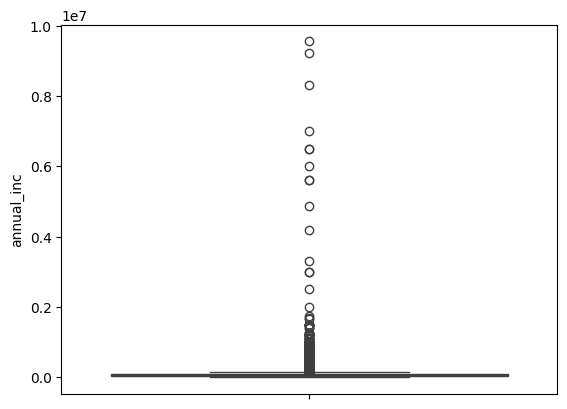

In [61]:
# Annual Income
sns.boxplot(df_all_encoded['annual_inc'])

##### Spliting Training and Testing data sets

In [58]:
#temp

df_all_encoded['inq_last_6mths'].describe()

count    191515.000000
mean          0.635569
std           0.918925
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: inq_last_6mths, dtype: float64

##### Normalize

In [59]:
X = df_all_encoded.drop(columns=['loan_status'])
y = df_all_encoded['loan_status']

# Splitting the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Applying Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(train_X_scaled, train_y)

# Predicting on the test set
predictions = logistic_model.predict(test_X_scaled)

# Calculating accuracy
accuracy = accuracy_score(test_y, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9987468453572361


##### Build a Model and Test

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Assuming you already have X, y from the previous code

# Splitting the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Applying Neural Network
# Initialize a neural network with 1 hidden layer of 100 neurons
neural_network_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Fit the model to the scaled training data
neural_network_model.fit(train_X_scaled, train_y)

# Predicting on the test set
predictions = neural_network_model.predict(test_X_scaled)

# Calculating accuracy
accuracy = accuracy_score(test_y, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9987468453572361
